<a href="https://colab.research.google.com/github/azizcodex/DBMS/blob/master/regvgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import itertools
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from glob import glob
import numpy as np
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = "/content/drive/MyDrive/datasetth/train"
test_path  = "/content/drive/MyDrive/datasetth/test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_batches= ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(train_path,target_size=(224,224),
                                                                                                                          batch_size=25)
test_batches= ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(test_path,target_size=(224,224),
                                                                                                                          batch_size=25, shuffle = False)

Found 9478 images belonging to 2 classes.
Found 2367 images belonging to 2 classes.


In [ ]:
resnet = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False
folders = glob("/content/drive/My Drive/datasetth/train/*")
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="Adam",
    metrics=['accuracy']
)

In [ ]:
es = EarlyStopping(monitor='accuracy', min_delta=1e-3, patience=8,
                   verbose=1, mode='auto', baseline=None,
                   restore_best_weights=True)

In [ ]:
model.fit(train_batches, steps_per_epoch=4,
         
          validation_steps = 2, 
          epochs = 120,
          verbose =2,
         callbacks = es 
          )  

Epoch 1/120
4/4 - 20s - loss: 9.7717 - accuracy: 0.6400
Epoch 2/120
4/4 - 25s - loss: 3.4402 - accuracy: 0.8500
Epoch 3/120
4/4 - 24s - loss: 5.2492 - accuracy: 0.6800
Epoch 4/120
4/4 - 22s - loss: 4.0611 - accuracy: 0.7900
Epoch 5/120
4/4 - 23s - loss: 4.4036 - accuracy: 0.8700
Epoch 6/120
4/4 - 24s - loss: 3.8431 - accuracy: 0.8800
Epoch 7/120
4/4 - 25s - loss: 1.7860 - accuracy: 0.9100
Epoch 8/120
4/4 - 21s - loss: 2.7685 - accuracy: 0.8500
Epoch 9/120
4/4 - 23s - loss: 1.8376 - accuracy: 0.8800
Epoch 10/120
4/4 - 22s - loss: 2.3869 - accuracy: 0.9100
Epoch 11/120
4/4 - 24s - loss: 3.1993 - accuracy: 0.8500
Epoch 12/120
4/4 - 21s - loss: 1.7793 - accuracy: 0.9200
Epoch 13/120
4/4 - 25s - loss: 2.8078 - accuracy: 0.8700
Epoch 14/120
4/4 - 20s - loss: 2.2649 - accuracy: 0.8600
Epoch 15/120
4/4 - 21s - loss: 2.4790 - accuracy: 0.8600
Epoch 16/120
4/4 - 21s - loss: 1.8406 - accuracy: 0.9000
Epoch 17/120
4/4 - 20s - loss: 2.1914 - accuracy: 0.9300
Epoch 18/120
4/4 - 24s - loss: 1.6196 - 

In [ ]:
test_lables = test_batches.classes
prediction = model.predict(x=test_batches, verbose=1)

95/95 [==============================] - 736s 8s/step


In [ ]:
predc = model.predict(test_batches, verbose=1)
confmat= confusion_matrix(y_true=test_lables, y_pred=predc.argmax(axis=1))

nr= confmat.shape[0]
nc= confmat.shape[1]

95/95 [==============================] - 11s 118ms/step


In [ ]:
cm = confusion_matrix(y_true=test_lables,
                      y_pred=prediction.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('/content/drive/MyDrive/datatwentypercent/regvgg.png')

Confusion matrix, without normalization
[[1727  136]
 [ 150  354]]


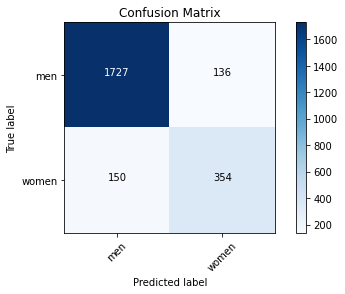

In [ ]:
cm_plt_lables =['men', 'women']
plot_confusion_matrix(cm= cm, classes=cm_plt_lables)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_lables, prediction.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1863
           1       0.72      0.70      0.71       504

    accuracy                           0.88      2367
   macro avg       0.82      0.81      0.82      2367
weighted avg       0.88      0.88      0.88      2367

